In [10]:
from commonfunctions import *
import numpy as np
import skimage
import skimage.io as io
import matplotlib.pyplot as plt
from skimage import filters, feature
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing, binary_opening, skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle
import cv2 as cv

# Convolution:
from scipy.signal import convolve2d
from scipy import fftpack
import math

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


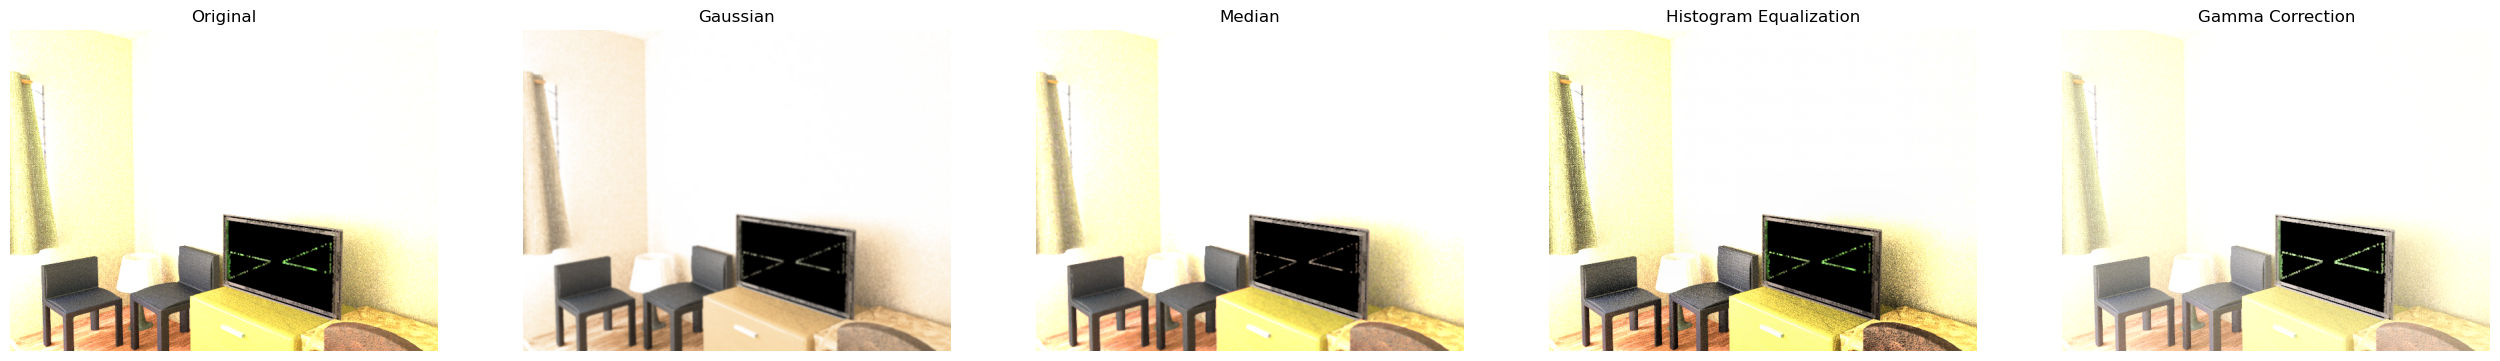

In [11]:
q1 = io.imread('./Q1.png')[:, :, :3]
q1_guassian = skimage.filters.gaussian(q1)
q1_median = skimage.filters.median(q1)
q1_eq = skimage.exposure.equalize_adapthist(q1)
q1_gamma = skimage.exposure.adjust_gamma(q1, gamma=0.5)
show_images([q1, q1_guassian, q1_median, q1_eq, q1_gamma], ['Original', 'Gaussian', 'Median', 'Histogram Equalization', 'Gamma Correction'])

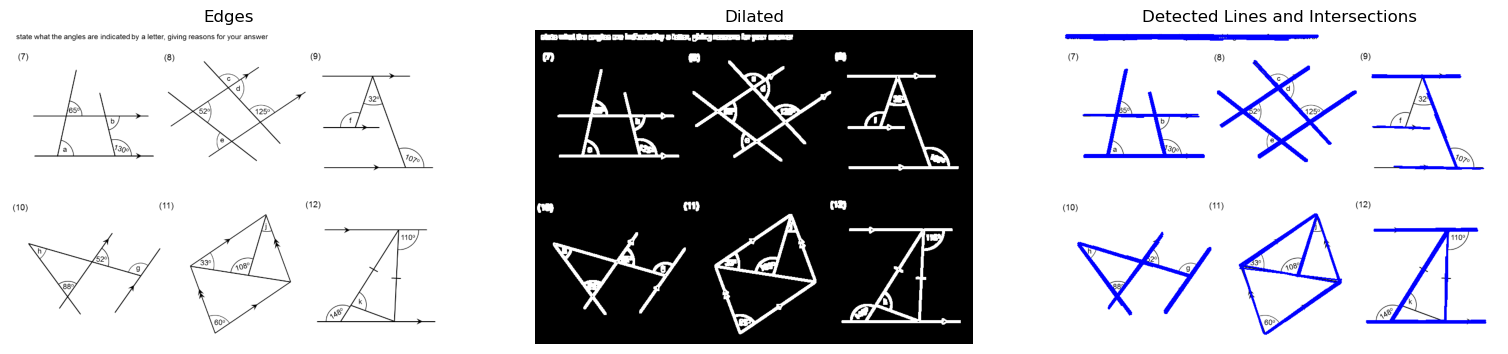

In [14]:
def clean_lines(lines):
    clean_lines = []

    for i in range(len(lines)):
        x1, y1, x2, y2 = lines[i][0]
        keep_line = False
        for j in range(len(lines)):
            if i == j:
                continue
            x3, y3, x4, y4 = lines[j][0]
            m1 = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else float('inf')
            m2 = (y4 - y3) / (x4 - x3) if (x4 - x3) != 0 else float('inf')
            if abs(m1 - m2) < 1e-3:
                continue

            vec1 = np.array([x2 - x1, y2 - y1])
            vec2 = np.array([x4 - x3, y4 - y3])

            angle = np.arccos(np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))) * 180 / np.pi

            if 40 >= angle <= 60:
                keep_line = True
                break
        
        if keep_line:
            clean_lines.append(lines[i])

    return clean_lines

image = cv.imread('./Q2.png', cv.IMREAD_GRAYSCALE)
image_dilated = skimage.feature.canny(image, sigma=1)
image_dilated = binary_dilation(image_dilated, np.ones((3, 3)))

lines = cv.HoughLinesP(image_dilated.astype(np.uint8), 1, np.pi / 180, threshold=50, minLineLength=100, maxLineGap=5)
lines = clean_lines(lines)

result_image = cv.cvtColor(image, cv.COLOR_GRAY2BGR)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv.line(result_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

show_images([image, image_dilated, result_image], ['Edges', 'Dilated', 'Detected Lines and Intersections'])

[[ 0.     0.     0.    ...  7.14   5.656  0.   ]
 [ 0.     0.     0.    ...  0.     4.125  7.14 ]
 [ 7.14   4.125  0.    ...  4.125  0.     4.125]
 ...
 [15.69  14.21   6.56  ...  9.     8.83  15.94 ]
 [ 2.45   5.832 13.34  ... 12.88  15.1    3.742]
 [15.03  15.07  13.49  ... 14.8   14.8    4.36 ]]


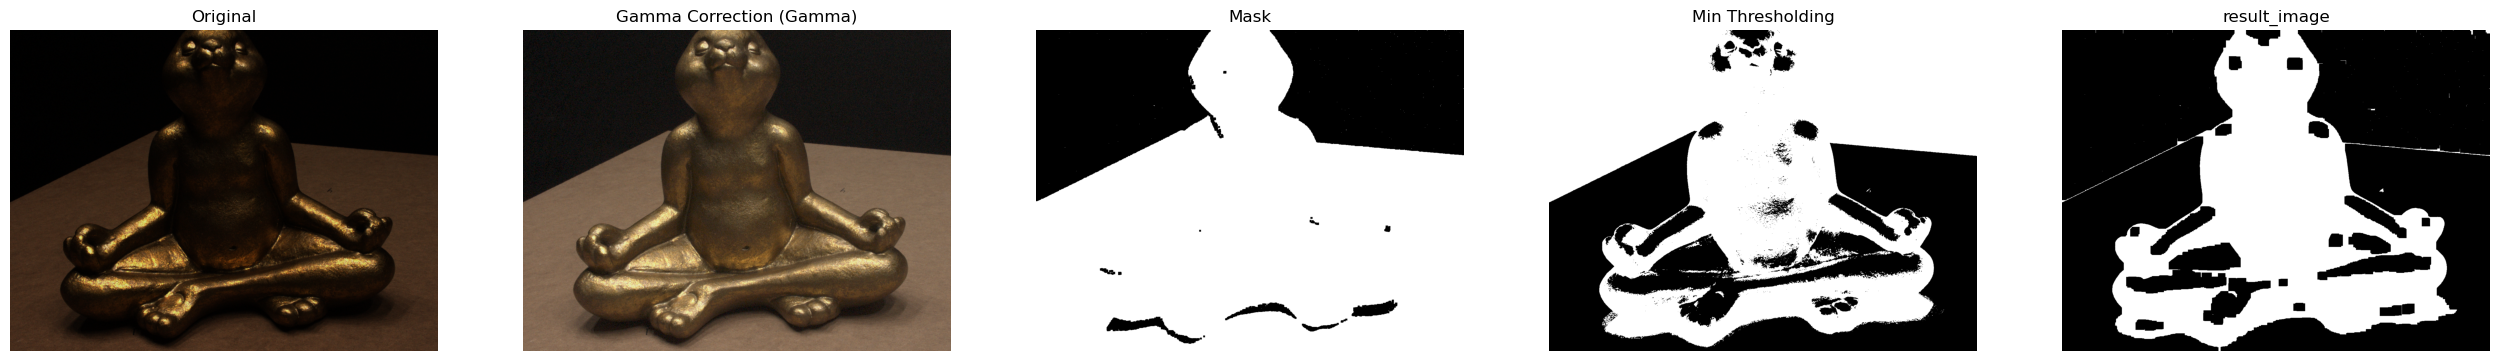

In [47]:
q3 = io.imread('./Q3.png')[:, :, :3]
q3_equ = skimage.exposure.adjust_gamma(q3, gamma=0.5)

threshold = skimage.filters.threshold_minimum(rgb2gray(q3_equ))

R = q3_equ[:, :, 0]
G = q3_equ[:, :, 1]
B = q3_equ[:, :, 2]

dist = np.sqrt(R**2 + G**2 + B**2)
print(dist)
mask = dist >  10
mask = binary_closing(mask, np.ones((7, 7)))
mask2 = rgb2gray(q3_equ) < threshold
#mask2 = binary_closing(mask2, np.ones((27, 27)))

result = binary_closing((mask & mask2), np.ones((27, 27)))
show_images([q3, q3_equ, mask, mask2, result], ['Original', 'Gamma Correction (Gamma)', 'Mask', 'Min Thresholding', 'result_image'])

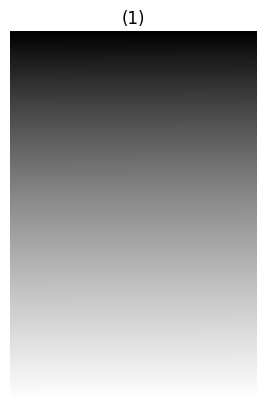

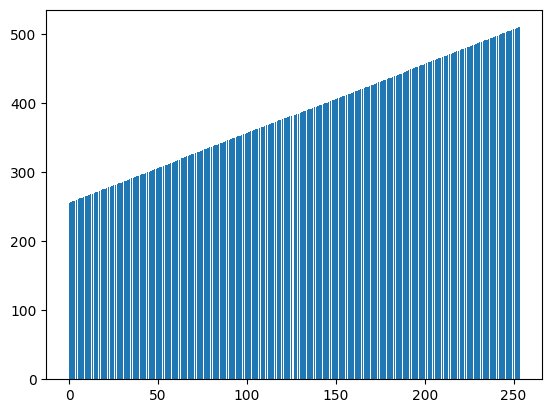

In [144]:
sum = 0
for i in range(255):
    x = i
    sum = sum + x + 256

rem_in_gray = 256
color = 0
image = np.zeros((int(sum/255), 255))
for x in range(image.shape[0]):
    for y in range(image.shape[1]):
        image[x][y] = color
        rem_in_gray -= 1
        if (rem_in_gray == 0):
            color += 1
            rem_in_gray = 256 + color


show_images([image])
showHist(image)